<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    ML for Bioinformatics <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
<font color=3C99D size=5>
    Homework 3: Practical - Multi-Layer Perceptron (MLP) <br>
<font color=696880 size=4>
    Sobhan Moghimi (sobhanmoghimi45@gmail.com) <br>
    Fakhredin Abdi (fakhredinabdi80@gmail.com) <br>
    
____


### Full Name : Parishad Mokhber 
### Student Number : 98100537
__

# Description

**In this assignment you'll be working with Dorothea Dataset.**

DOROTHEA is a drug discovery dataset. Chemical compounds represented by structural molecular features must be classified as active (binding to thrombin) or inactive.
To find out more about dataset, refer to this link: https://archive.ics.uci.edu/ml/datasets/Dorothea

You should implement a classifier with Neural Networks and for this purpose we will be using PyTorch as framework.

# Importing libraries, modules and Dataset.

In [1]:
pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In this part, import all the libraries and modules needed to solve the problem.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
%matplotlib inline
import os
import random 
import torch 
import torch.nn as nn
import numpy as np
import time
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
import sklearn

Now import the train and test data from dataset.

In [3]:
# Your code here
def read_sparse(file_path , rows, cols):
  matrix =np.zeros((rows, cols), dtype = int)
  with open (file_path , 'r') as file:
    for row_idx, line in enumerate(file):
      column_indices = map(int, line.split())
      matrix[row_idx , np.array(list(column_indices))-1] = 1
      return matrix


n_features = 100000
train_count, test_count = 800, 350

train_data = read_sparse('dorothea_train.data', train_count, n_features)
train_labels = np.genfromtxt('dorothea_train.labels')
test_data = read_sparse('dorothea_valid.data', test_count, n_features)
test_labels = np.genfromtxt('dorothea_valid.labels')

print(train_data.shape)
print(train_labels.shape)

print(test_data.shape)
print(test_labels.shape)

(800, 100000)
(800,)
(350, 100000)
(350,)


## Normalize
You can normalize your data using <code>Scikit-Learn</code> modules here.

In [4]:
# Apply normalization here
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(train_data)
train_data_scaled = scaler.transform(train_data)
test_data_scaled = scaler.transform(test_data)

## Dimensionality Reduction
There are too many attributes for each instance of dataset. We will suffer from sparse data and long training phase. Thus you can reduce dimensions to get better accuracy. 

Principal component analysis (PCA) is the process of computing the principal components and using them to perform a change of basis on the data.

Apply PCA on Dorothea dataSet using <code>Scikit-Learn</code>.

In [5]:
# Apply PCA here
from sklearn.decomposition import SparsePCA
pca = SparsePCA(n_components = 50).fit(train_data_scaled)
train_data_scaled_pca = pca.transform(train_data_scaled)
test_data_scaled_pca = pca.transform(test_data_scaled)

# Define Model



In [6]:
# Define your model in here
# You can change the code below.

class ClassifierModel(nn.Module):
    def __init__(self):
      super(ClassifierModel, self).__init__()
      #self.layer1 = nn.Linear(in_features= 500, out_features= 100, bias = True)
      self.layer2 = nn.Linear(in_features= 50, out_features= 100, bias = True)
      self.layer3 = nn.Linear(in_features= 100, out_features=1, bias = True)
      self.activation = nn.ReLU()
      self.sigmoid = nn.Sigmoid()


    def forward(self, x_input):
      # x_input = self.layer1(x_input)
      # x_input = self.activation(x_input)
      x_input = self.layer2(x_input)
      x_input = self.activation(x_input)
      x_out = self.layer3(x_input)
      x_out = self.sigmoid(x_out)

      return x_out

# Train the model

**Initialize model, define hyperparameters, optimizer, loss function, etc.**

In [7]:
# Implement Train in here
BATCH_SIZE = 32
NUM_EPOCHS = 100

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
criterion = nn.BCELoss()
model = ClassifierModel().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.005)

In [8]:
train_data_scaled_pca = torch.from_numpy(train_data_scaled_pca)
train_labels = torch.from_numpy(train_labels)
train_labels[train_labels == -1] = 0

dataset = TensorDataset(train_data_scaled_pca.float(), train_labels.float().unsqueeze(1))
train_loader = DataLoader(dataset, batch_size = BATCH_SIZE, shuffle=True)

In [9]:
loss_list = []
for epoch in range(NUM_EPOCHS):
    model.train()
    loss_epoch = 0.0
    
    for i, (X, y) in enumerate(train_loader):
        X = X.to(DEVICE)
        y = y.to(DEVICE)
        outputs = model(X)
        loss = criterion(outputs, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_epoch += loss.item()
    
    loss_epoch = loss_epoch/len(train_loader)
    print ('Epoch [{}/{}], Loss: {}'.format(epoch+1, NUM_EPOCHS, loss_epoch))
    loss_list.append(loss_epoch)

Epoch [1/100], Loss: 0.522056792974472
Epoch [2/100], Loss: 0.3286279860138893
Epoch [3/100], Loss: 0.3235706838965416
Epoch [4/100], Loss: 0.31988894045352934
Epoch [5/100], Loss: 0.32011433839797976
Epoch [6/100], Loss: 0.3204987373948097
Epoch [7/100], Loss: 0.32139421939849855
Epoch [8/100], Loss: 0.3213486671447754
Epoch [9/100], Loss: 0.32063947767019274
Epoch [10/100], Loss: 0.3197784012556076
Epoch [11/100], Loss: 0.31988743305206296
Epoch [12/100], Loss: 0.32016008496284487
Epoch [13/100], Loss: 0.3212187710404396
Epoch [14/100], Loss: 0.32103443145751953
Epoch [15/100], Loss: 0.3202620595693588
Epoch [16/100], Loss: 0.3207948386669159
Epoch [17/100], Loss: 0.3203903797268868
Epoch [18/100], Loss: 0.32032157957553864
Epoch [19/100], Loss: 0.3204386070370674
Epoch [20/100], Loss: 0.3205381569266319
Epoch [21/100], Loss: 0.3198648577928543
Epoch [22/100], Loss: 0.322838628590107
Epoch [23/100], Loss: 0.32072913646698
Epoch [24/100], Loss: 0.3211832019686699
Epoch [25/100], Loss:

**After the training process, plot metrics such as loss function values.**

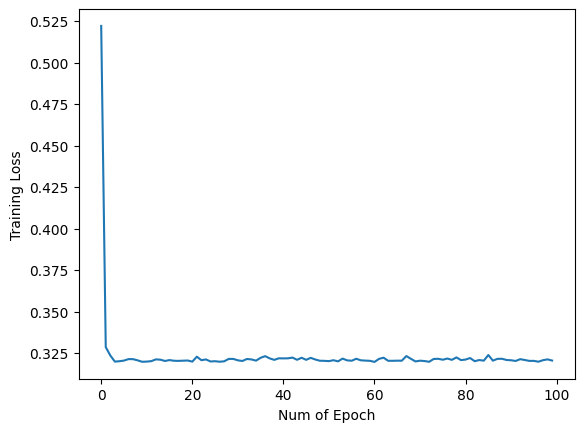

In [10]:
# Plot in here
plt.plot(loss_list)
plt.xlabel('Num of Epoch')
plt.ylabel('Training Loss');

# Testing
After training, test your model on test dataset and compute performance metrics. 

In [11]:
# Implement Test in here
test_data_scaled_pca = torch.from_numpy(test_data_scaled_pca)
test_labels = torch.from_numpy(test_labels)
test_labels[test_labels == -1] = 0

dataset_test = TensorDataset(test_data_scaled_pca.float(), test_labels.float().unsqueeze(1))
test_loader = DataLoader(dataset_test, batch_size = len(test_labels), shuffle=True)

model.eval()

with torch.no_grad():
  correct = 0
  total = 0
  for i, (X, y) in enumerate(test_loader):
        X = X.to(DEVICE)
        y = y.to(DEVICE)
        outputs = model(X)

        y_pred = torch.round(outputs)

        total += y.size(0)
        correct += (y_pred == y).sum().item()


print('Accuracy on the test samples: {} %'.format(100 * correct / total)) 

Accuracy on the test samples: 90.28571428571429 %


Show confusion matrix of your model.

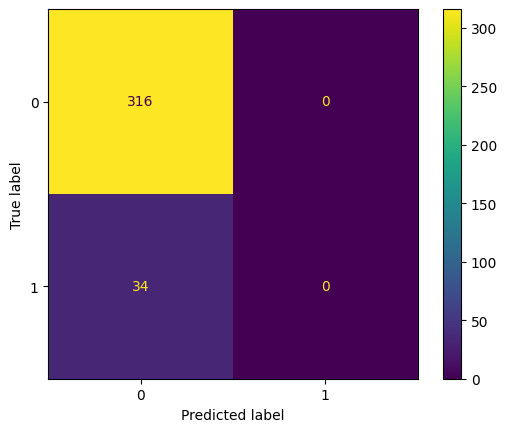

In [12]:
# Print your confusion matrix here.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(test_labels.cpu(), y_pred.cpu())
disp = ConfusionMatrixDisplay(cm)
disp.plot();